1. In your own words, describe:

a. Bias and variance in machine learning.

Bias is the difference between expected and predicted y's. Bias creates consistent error in the model. Variance refers to the amount of change observed in the predicted values when we change the training set, or the
variability of the predictions. 

b. Describe the bias-variance tradeoff.

If the model has high variance, it tends to have low bias, which refers to overfitting the model. If the model has low variance, it tends to have high bias, which refers to underfitting the model. 

c. In 3 or less sentences, describe bias and variance in relation to complex and simple models. When is variance high? When is it low? How about bias?

If the model is simple and less flexible, the variance tends to be low and bias is high. If the model is flexible and complicated, the bias tends to be low and variance is high. 

2. List the assumptions of linear regression.

- There is a linear relationship between the predictor and predicted variables.
- The observations are independent.
- The variance of the errors is consistent across all levels of the dependent variable.
- The errors are normally distributed.
- There is no multicollinearity.

3. The following regression equation shows the effects of biking and smoking on heart disease. Interpret the coefficients in the model. 

For every 1 unit change in biking, there is a -0.2 unit change in heart disease, meaning they are negatively correlated. For every 1 unit change in smoking, there is a 0.178 unit change in heart disease, meaning they are positively correlated.

4. The following is the R output of a multiple linear regression model. We want to estimate sales as a function of advertising budget invested in different media: YouTube, Facebook, and Newspapers.

a. Write down the equation for the above regression.

y = 3.52667 + 0.04567youtube + 0.18853facebook - 0.00104newspaper

b. Interpret the above output focusing on the residuals, the coefficients, the standard error, the t value, the p value, R squared and the F statistic.

residuals- Residuals are the difference between the observed and predicted y, so the min, 1Q, median, 3Q, and max show the spread of all the residuals in the model. Since the min is -10.59 and the max is 3.40, this could suggest skewed data, and that the mean is not equal to the median.

coefficients- For every 1 unit increase in youtube advertising budget, there is a 0.04567 unit increase in sales. For every 1 unit increase in facebook advertising budget, there is a 0.18853 unit increase in sales. For every 1 unit increase in newspaper advertising budget, there is a 0.00104 unit decrease in sales. 

standard error- Standard error measures the average amount an estimate deviates from the actual value. The standard error values are relatively small, so that means the values are not very spread out and/or there are a lot of sample units for each x value.

t value- The t-value helps us determine if the data are statistically significant, which gives us the value for Pr(>|t|). Since Pr(>|t|)<0.05 for all values except newpaper, those values are significant. However, the value for newpaper is insignificant. 

p value- P-value is the probability of observing the evidence under the null assumption, and since the p-value is small, the data is statistically significant enough to reject the null hypothesis. At least one of the variables has a statistically significant relationship with sales.

R squared- R squared is the portion of the y explained by the x's, so 89.7% of variation in sales can be explained by the linear regression model.

F statistic- The F statistic shows the global fit of the model. This value shows that all of the x variables can explain the y variable.

In [ ]:
# Python version 3.9.12, conda version 22.9.0

In [2]:
import numpy as np # v 1.21.5
import sklearn # v 0.0
import pandas as pd # v 1.4.2
import ydata_profiling as pp # v 4.5.1
import matplotlib.pyplot as plt # v 3.5.1
import statsmodels.api as sm # v.0.13.2

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


%matplotlib inline

EDA

In [3]:
ca_houses = pd.read_csv("/Users/heidibeardsley/Downloads/California_Houses.csv")

In [9]:
ca_houses.shape, ca_houses.columns, ca_houses.dtypes

((20640, 14),
 Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
        'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
        'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
        'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
       dtype='object'),
 Median_House_Value          float64
 Median_Income               float64
 Median_Age                    int64
 Tot_Rooms                     int64
 Tot_Bedrooms                  int64
 Population                    int64
 Households                    int64
 Latitude                    float64
 Longitude                   float64
 Distance_to_coast           float64
 Distance_to_LA              float64
 Distance_to_SanDiego        float64
 Distance_to_SanJose         float64
 Distance_to_SanFrancisco    float64
 dtype: object)

In [39]:
ca_houses.isna().sum()

# no missing values

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

In [19]:
ca_houses.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [20]:
ca_houses.tail()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166
20639,89400.0,2.3886,16,2785,616,1387,530,39.37,-121.24,146866.196892,648723.337126,825569.179028,233282.769063,205473.376575


In [21]:
ca_houses.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


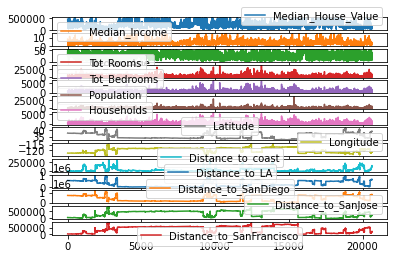

<Figure size 259200x181440 with 0 Axes>

In [27]:
ca_houses.plot(subplots=True)
plt.show()

# Many variables in the dataset seem to be correlated with one another.

In [ ]:
pp.ProfileReport(ca_houses)

# always crashes the kernel, unsure why.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Machine Learning

In [12]:
y = ca_houses.Median_House_Value

In [16]:
x = ca_houses.loc[:, ca_houses.columns != "Median_House_Value"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [19]:
model = LinearRegression()

In [20]:
model.fit(x_train, y_train)

LinearRegression()

In [21]:
model.coef_

array([ 3.92350456e+04,  8.57173901e+02, -6.27518202e+00,  9.89201998e+01,
       -3.98576147e+01,  5.54067767e+01, -4.56185190e+04, -2.70359518e+04,
       -2.25575153e-01, -1.45160265e-01,  2.50801184e-01,  1.66833378e-01,
       -1.41222782e-01])

In [23]:
print(model.intercept_, model.coef_,model.score(x_test, y_test))

-1639814.9702004073 [ 3.92350456e+04  8.57173901e+02 -6.27518202e+00  9.89201998e+01
 -3.98576147e+01  5.54067767e+01 -4.56185190e+04 -2.70359518e+04
 -2.25575153e-01 -1.45160265e-01  2.50801184e-01  1.66833378e-01
 -1.41222782e-01] 0.6540306373366478


R^2 = 0.654. This is an acceptable R squared value and is generally a good fit. 65.4% of the variability is explained by the model.

In [26]:
y_pred = model.predict(x_test)

In [42]:
y_pred

array([138347.62072032, 210482.3339375 , 119767.88728811, ...,
       224302.620426  , 209270.37819201,  95918.22986394])

In [27]:
MAE = mean_absolute_error(y_test,y_pred)

In [28]:
MSE = mean_squared_error(y_test,y_pred)

In [29]:
MAPE =  mean_absolute_percentage_error(y_test,y_pred)

In [30]:
MSE, MAE,MAPE

(4773284091.24259, 50439.7858327504, 0.29162671574513394)